In [18]:
import seaborn
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pylab as pl
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

# What Tickets Are Being Prioritized by the NYPD?
### Load Data

In [14]:
# Load data to Dataframe
path = '/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/TicketSummonses/Annual_Data_City/'
df = pd.read_csv(path + 'NYCTicketSummonses.csv', index_col = 0).transpose()

# Drop extra rows
df.drop(df.index[[-1, -2, -12]], inplace=True)
df.dropna(axis = 0, how = 'any', inplace=True)

# Calculate columns.
df.columns = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015']
df['PreVZ_Mean'] = (df['Y2011'] + df['Y2012'] + df['Y2013']) / 3
df['PostVZ_Mean'] = (df['Y2014'] + df['Y2015']) / 2
df['PercentChange'] = ((df['PostVZ_Mean'] - df['PreVZ_Mean']) / df['PreVZ_Mean'] * 100).round(2)
df['zscore'] = sc.mstats.zscore(df.PercentChange)

### Cluster Points to Observe NYPD Priorities

In [15]:
X = df.PercentChange
range_n_clusters = [3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X.reshape(-1, 1))
    silhouette_avg = silhouette_score(X.reshape(-1, 1), cluster_labels)
    print("For n_clusters = {}".format(n_clusters) +
          " the average silhouette_score is :{}".format(silhouette_avg.round(3)))

For n_clusters = 3 the average silhouette_score is :0.619
For n_clusters = 4 the average silhouette_score is :0.616
For n_clusters = 5 the average silhouette_score is :0.698
For n_clusters = 6 the average silhouette_score is :0.681
For n_clusters = 7 the average silhouette_score is :0.622


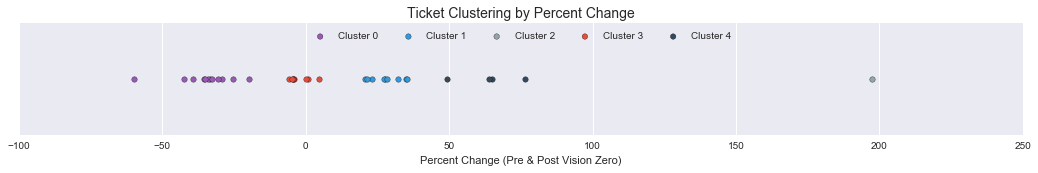

In [16]:
km = KMeans(n_clusters=5, random_state=30)
df['P1'] = km.fit_predict(X.reshape(-1, 1))

groups = df.groupby('P1')

# Plot by groups
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (18, 2))
ax1.axes.get_yaxis().set_ticks([])
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
for name, group in groups:
    label = 'Cluster ' + str(name)
    ax1.scatter(group['PercentChange'], np.zeros(group['PercentChange'].shape),
                label = label, c = colors[name], s=30)
ax1.set_xlabel('Percent Change (Pre & Post Vision Zero)')
ax1.set_title('Ticket Clustering by Percent Change', fontsize = 14)
ax1.legend(ncol=5, loc='upper center')

In [17]:
df.sort_values('zscore', axis = 0, ascending = False, inplace = True)
df

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,zscore,P1
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,12344.666667,36715.0,197.42,4.000184,2
School_Bus_Passing_Stopped,2739.0,3312.0,1371.0,5428.0,3298.0,2474.000000,4363.0,76.35,1.444892,4
Not_Giving_RofW_to_Veh,1951.0,2139.0,2335.0,3365.0,3696.0,2141.666667,3530.5,64.85,1.202174,4
Speeding,76493.0,71305.0,83202.0,117767.0,134438.0,77000.000000,126102.5,63.77,1.179379,4
Fail_to_Signal,13879.0,14208.0,18588.0,22088.0,24376.0,15558.333333,23232.0,49.32,0.874399,4
Unsafe_Lane_Change,4836.0,4203.0,4563.0,5880.0,6408.0,4534.000000,6144.0,35.51,0.582926,1
Fail_to_Stop_on_Signal,41644.0,37945.0,41055.0,53445.0,55199.0,40214.666667,54322.0,35.08,0.573851,1
U_Turn,3924.0,3912.0,4921.0,6930.0,4311.0,4252.333333,5620.5,32.17,0.512433,1
Improper_Turn,55601.0,56586.0,62356.0,73234.0,76049.0,58181.000000,74641.5,28.29,0.430542,1
Commercial_Veh_Pkwy,1658.0,864.0,1063.0,1430.0,1618.0,1195.000000,1524.0,27.53,0.414501,1


### Plot Percent Change Distribution

In [6]:
# fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))

# # Plot KDE of percent change.
# ax1 =  df.PercentChange.plot.kde(c = 'r')
# ax1.axis([-2, 3, 0, 1])

# # Get local minima where x[1:2]
# x = [(i,j) for (i,j) in zip(ax1.get_children()[0]._x,
#                             ax1.get_children()[0]._y) if i > 1 and i < 2]
# minima = min(x, key = lambda t: t[1])

# # Plot priority ranges on KDE
# pl.axvspan(1.3962541118, 3, color = '#17891F', alpha = 0.3, zorder = 1, label = 'Priority 1')
# pl.axvspan(0.372000488296, 1.3962541118, color = '#4CDC55', alpha = 0.3, zorder = 1, label = 'Priority 2')
# pl.axvspan(0.0214814108441, 0.372000488296, color = '#B4F6B9', alpha = 0.3, zorder = 1, label = 'Priority 3')
# pl.axvspan(-0.329037666608, 0.0214814108441, color = '#B4D3F6', alpha = 0.3, zorder = 1, label = 'Priority 4')
# pl.axvspan(-2, -0.329037666608, color = '#4C8FDC', alpha = 0.3, zorder = 1, label = 'Priority 5')
# ax1.set_xlabel('Percentage Change')
# ax1.set_title('Percent Change of Vision Zero KDE')
# ax1.legend()

# print minima

In [7]:
# dist = [(i, j) for (i, j) in zip(ax1.get_children()[5]._x,
#                             ax1.get_children()[5]._y) if i > minima[0]]
# y = [j for (i, j) in dist]
# x = [i for (i, j) in dist]

In [8]:
# summary = df.PercentChange.describe()
# print summary[1] - summary[2]
# print summary[1]
# print summary[1] + summary[2]
# print minima[0]

In [9]:
# priority = []
# for row in df['PercentChange']:
#     if row < summary[1] - summary[2]:
#         priority.append(5)
#     elif row > summary[1] - summary[2] and row < summary[1]:
#         priority.append(4)
#     elif row > summary[1] and row < summary[1] + summary[2]:
#         priority.append(3)
#     elif row > summary[1] + summary[2] and row < minima[0]:
#         priority.append(2)
#     elif row >= minima[0]:
#         priority.append(1)
# df['P1'] = priority
# df.sort_values('zscore', axis = 0, ascending = False, inplace = True)